In [1]:
# pip install tensorflow

In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Perceptrons

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\badbw\AppData\Local\Temp/ipykernel_8872/2152957107.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [4]:
y_pred

array([1])

Saving figure perceptron_iris_plot


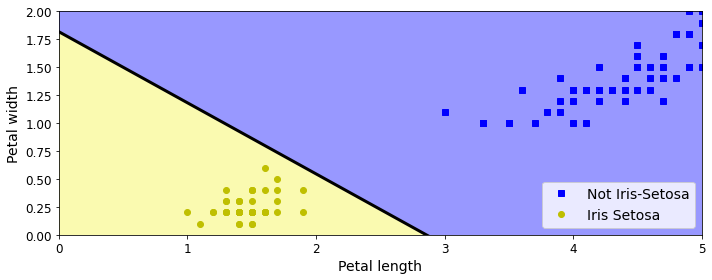

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label="Iris Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', "#fafab0"])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()


## Activation Functions

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


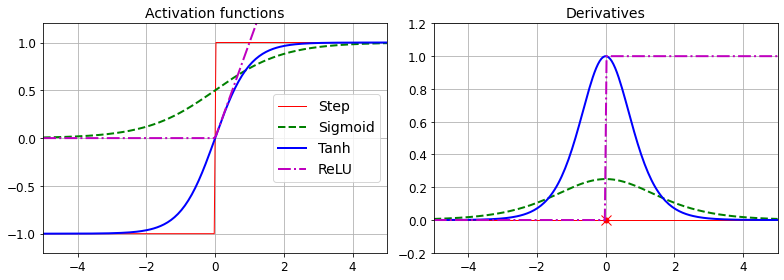

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

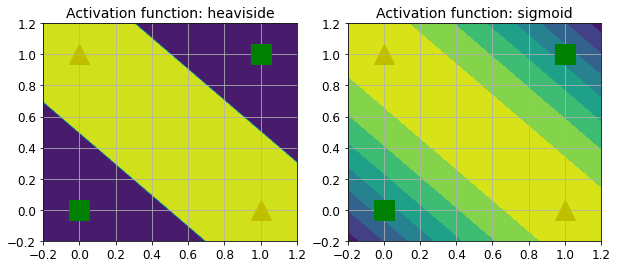

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)



## Building an Image Classifier

In [10]:
import tensorflow as tf
from tensorflow import keras

In [12]:
tf.__version__

'2.11.0'

In [13]:
keras.__version__

'2.11.0'

In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


The training set contains 60,000 grayscale images, each 28*28 pixels:

In [15]:
X_train_full.shape

(60000, 28, 28)

In [16]:
X_train_full.dtype

dtype('uint8')

Split the full training set into a validations set and a training set

In [17]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

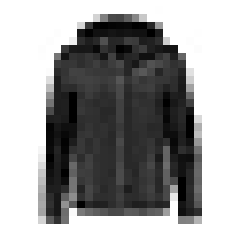

In [18]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8) from 0 to 9

In [19]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
X_valid.shape

(5000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


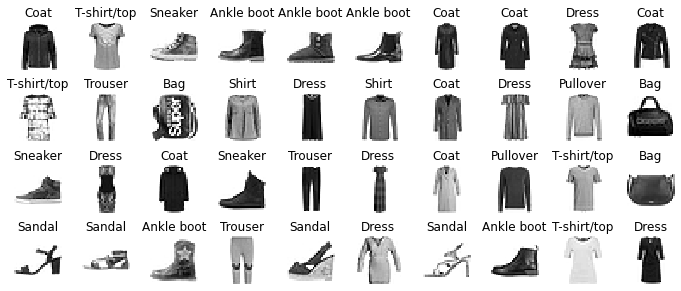

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.layers

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [35]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [36]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [37]:
model.get_layer(hidden1.name) is hidden1

True

In [38]:
weights, biases = hidden1.get_weights()

In [39]:
weights

array([[-0.04863865, -0.03801107, -0.03710578, ..., -0.0285207 ,
         0.04032479, -0.04078871],
       [ 0.05094671,  0.03997851,  0.03645627, ..., -0.04970209,
         0.06823446,  0.0275643 ],
       [-0.02587046,  0.00261502,  0.01061408, ..., -0.03870107,
         0.03249224,  0.07230587],
       ...,
       [ 0.00712063, -0.01814483, -0.05896292, ...,  0.00938946,
        -0.00729216,  0.03772955],
       [-0.04829691,  0.0216866 ,  0.04713159, ..., -0.03595142,
        -0.06511797,  0.01553526],
       [-0.00953507,  0.04542863,  0.05129747, ..., -0.04357245,
         0.00333197,  0.04310357]], dtype=float32)

In [40]:
weights.shape

(784, 300)

In [41]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [42]:
biases.shape

(300,)

In [43]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
              metrics=["accuracy"]
             )

In [46]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2213 - accuracy: 0.9197 - val_loss: 0.2972 - val_accuracy: 0.8934
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2185 - accuracy: 0.9213 - val_loss: 0.2922 - val_accuracy: 0.8924
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2146 - accuracy: 0.9230 - val_loss: 0.3639 - val_accuracy: 0.8664
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2116 - accuracy: 0.9241 - val_loss: 0.2912 - val_accuracy: 0.8964
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2100 - accuracy: 0.9250 - val_loss: 0.2841 - val_accuracy: 0.8976
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2042 - accuracy: 0.9267 - val_loss: 0.3030 - val_accuracy: 0.8912
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2011 - accuracy: 0.9281 - val_loss: 0.2969 - val_accuracy:

In [47]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [48]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [49]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


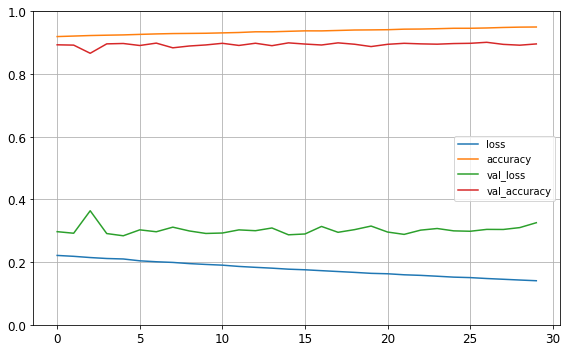

In [50]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [51]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3625 - accuracy: 0.8834


[0.362509548664093, 0.883400022983551]

In [52]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 316ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 22ms/step


array([9, 2, 1], dtype=int64)

In [54]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [55]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


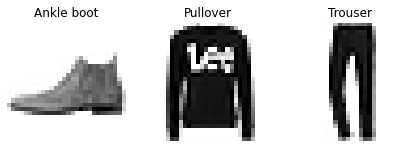

In [56]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()


## Regression MLP

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 3ms/step - loss: 1.8913 - val_loss: 1.1977
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8642 - val_loss: 0.7665
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7550 - val_loss: 0.7417
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7076 - val_loss: 0.6762
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6704 - val_loss: 0.6408
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6377 - val_loss: 0.6151
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6096 - val_loss: 0.6049
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5849 - val_loss: 0.5585
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5627 - val_loss: 0.5430
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5434 - val_loss: 0.5296

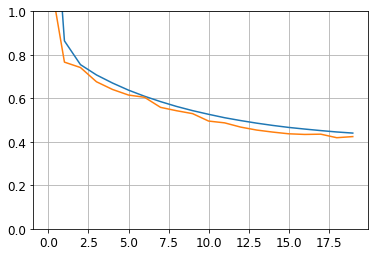

In [63]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
y_pred

array([[0.7769151],
       [1.5046074],
       [3.3040407]], dtype=float32)

## Functional API

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output =keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 30)           270         ['input_2[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 30)           930         ['dense_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_2[0][0]',                
                                                                  'dense_9[0][0]']            

In [69]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.7086 - val_loss: 1.9298
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6805 - val_loss: 0.6199
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6143 - val_loss: 0.6352
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5814 - val_loss: 0.5708
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5549 - val_loss: 0.5480
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5329 - val_loss: 0.5140
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5165 - val_loss: 0.5167
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5042 - val_loss: 0.5601
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4908 - val_loss: 0.4834
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4810 - val_loss: 0.4629

In [70]:
np.random.seed(42)
tf.random.set_seed(42)

In [71]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [72]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2998 - val_loss: 1.2669
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7880 - val_loss: 0.7506
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6211 - val_loss: 0.6397
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5587 - val_loss: 0.6244
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5261 - val_loss: 0.5666
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5013 - val_loss: 0.5839
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4852 - val_loss: 0.5538
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4716 - val_loss: 0.5245
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4608 - val_loss: 0.5371
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4526 - val_loss: 0.5331

In [73]:
np.random.seed(42)
tf.random.set_seed(42)

In [76]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [78]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [79]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.5146 - main_output_loss: 2.2709 - aux_output_loss: 4.7075 - val_loss: 1.8554 - val_main_output_loss: 1.6667 - val_aux_output_loss: 3.5538
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 1.0547 - main_output_loss: 0.8515 - aux_output_loss: 2.8841 - val_loss: 0.9209 - val_main_output_loss: 0.7729 - val_aux_output_loss: 2.2536
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.8433 - main_output_loss: 0.7074 - aux_output_loss: 2.0670 - val_loss: 0.7774 - val_main_output_loss: 0.6657 - val_aux_output_loss: 1.7825
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7540 - main_output_loss: 0.6502 - aux_output_loss: 1.6886 - val_loss: 0.7386 - val_main_output_loss: 0.6390 - val_aux_output_loss: 1.6357
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7026 - main_output_loss: 0.6138 - aux_output_loss: 1.5017 - val_loss

In [80]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 78ms/step


## The subclassing API

In [84]:

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [85]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.7610 - output_1_loss: 2.3242 - output_2_loss: 6.6921 - val_loss: 2.0521 - val_output_1_loss: 1.5920 - val_output_2_loss: 6.1928
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 1.2171 - output_1_loss: 0.8180 - output_2_loss: 4.8091 - val_loss: 1.1312 - val_output_1_loss: 0.8379 - val_output_2_loss: 3.7701
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.9273 - output_1_loss: 0.6732 - output_2_loss: 3.2141 - val_loss: 0.8173 - val_output_1_loss: 0.6274 - val_output_2_loss: 2.5259
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7857 - output_1_loss: 0.6160 - output_2_loss: 2.3123 - val_loss: 0.7140 - val_output_1_loss: 0.5721 - val_output_2_loss: 1.9915
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.7083 - output_1_loss: 0.5818 - output_2_loss: 1.8463 - val_loss: 0.6570 - val_output_1_loss: 0.5344 - val_ou

## Saving and Restoring

In [87]:
np.random.seed(42)
tf.random.set_seed(42)

In [90]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [91]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 2.1300 - val_loss: 8.6650
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8386 - val_loss: 1.2136
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6796 - val_loss: 0.6593
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6238 - val_loss: 0.6102
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5809 - val_loss: 0.5380
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5445 - val_loss: 0.4990
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5170 - val_loss: 0.4728
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4940 - val_loss: 0.4547
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4753 - val_loss: 0.4384
Epoch 10/10
162/162 [==============================] - 0s 2ms/step - loss: 0.4541


In [92]:
model.save("my_keras_model.h5")

In [93]:
model = keras.models.load_model("my_keras_model.h5")

In [94]:
model.predict(X_new)

1/1 [==============================] - 0s 46ms/step


array([[0.72273177],
       [1.4260293 ],
       [2.9765525 ]], dtype=float32)

In [95]:
model.save_weights("my_keras_weights.ckpt")

In [96]:
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks during Training

In [97]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [100]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 2s 4ms/step - loss: 1.4970 - val_loss: 0.8336
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.6593 - val_loss: 0.6049
Epoch 3/10
363/363 [==============================] - 2s 5ms/step - loss: 0.5871 - val_loss: 0.5658
Epoch 4/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5388 - val_loss: 0.5103
Epoch 5/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5051 - val_loss: 0.4728
Epoch 6/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4786 - val_loss: 0.4444
Epoch 7/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4604 - val_loss: 0.4271
Epoch 8/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4466 - val_loss: 0.4159
Epoch 9/10
363/363 [==============================] - 2s 6ms/step - loss: 0.4363 - val_loss: 0.4085
Epoch 10/10
162/162 [==============================] - 1s 4ms/step - loss: 0.4278


In [103]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 3s 7ms/step - loss: 0.4217 - val_loss: 0.4007
Epoch 2/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4162 - val_loss: 0.4079
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4114 - val_loss: 0.4029
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4070 - val_loss: 0.4085
Epoch 5/100
363/363 [==============================] - 2s 6ms/step - loss: 0.4036 - val_loss: 0.4002
Epoch 6/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3998 - val_loss: 0.4036
Epoch 7/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3972 - val_loss: 0.4011
Epoch 8/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3944 - val_loss: 0.3919
Epoch 9/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3919 - val_loss: 0.3922
Epoch 10/100
363/363 [==============================] - 2s 6ms/step - loss: 0.3896 - val_lo

In [104]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [107]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[val_train_ratio_cb])

358/363 [============================>.] - ETA: 0s - loss: 0.3772
val/train: 1.02
363/363 [==============================] - 2s 6ms/step - loss: 0.3777 - val_loss: 0.3869


## TensorBoard

In [108]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [109]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_12_06-22_23_49'

In [110]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [111]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [112]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 8ms/step - loss: 1.9858 - val_loss: 0.8697
Epoch 2/30
363/363 [==============================] - 2s 6ms/step - loss: 0.7395 - val_loss: 0.6949
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6510 - val_loss: 0.5881
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5998 - val_loss: 0.5826
Epoch 5/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5627 - val_loss: 0.5293
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5308 - val_loss: 0.5221
Epoch 7/30
363/363 [==============================] - 2s 6ms/step - loss: 0.5056 - val_loss: 0.4802
Epoch 8/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4841 - val_loss: 0.4600
Epoch 9/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4667 - val_loss: 0.4634
Epoch 10/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4529 - val_loss: 0.4445

In [113]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 18608.

In [114]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_12_06-22_26_01'

In [116]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [118]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 4s 8ms/step - loss: 0.6359 - val_loss: 52.0625
Epoch 2/30
363/363 [==============================] - 2s 7ms/step - loss: 0.4885 - val_loss: 1.5385
Epoch 3/30
363/363 [==============================] - 3s 7ms/step - loss: 0.3915 - val_loss: 0.3947
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3716 - val_loss: 0.8145
Epoch 5/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3567 - val_loss: 0.3459
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3470 - val_loss: 0.3357
Epoch 7/30
363/363 [==============================] - 2s 6ms/step - loss: 0.4291 - val_loss: 0.6051
Epoch 8/30
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 2s 6ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/

In [120]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



## Hyperparameter Tuning

In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [124]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\badbw\AppData\Local\Temp/ipykernel_8872/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [125]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])



Epoch 1/100
363/363 [==============================] - 3s 6ms/step - loss: 1.2607 - val_loss: 6.6640
Epoch 2/100
363/363 [==============================] - 2s 5ms/step - loss: 0.6854 - val_loss: 3.6134
Epoch 3/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5628 - val_loss: 2.4527
Epoch 4/100
363/363 [==============================] - 2s 5ms/step - loss: 0.5152 - val_loss: 1.4044
Epoch 5/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4761 - val_loss: 0.7625
Epoch 6/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4549 - val_loss: 0.6891
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4436 - val_loss: 0.5231
Epoch 8/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4319 - val_loss: 0.3965
Epoch 9/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4241 - val_loss: 0.3900
Epoch 10/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4176 - val_lo

In [126]:
mse_test = keras_reg.score(X_test, y_test)


162/162 [==============================] - 1s 4ms/step - loss: 0.3650


In [128]:
y_pred = keras_reg.predict(X_new)



1/1 [==============================] - 0s 128ms/step


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)



In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)           .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_test, y_test)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)